In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

In [4]:

df = pd.read_csv('Datasets/Clustering_gmm (2).csv')

df_selected = df[['Weight', 'Height']].values

dbscan_instance = DBSCAN(eps=0.5, min_samples=2)
labels = dbscan_instance.fit_predict(df_selected)

df['cluster'] = labels

In [5]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_instance.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

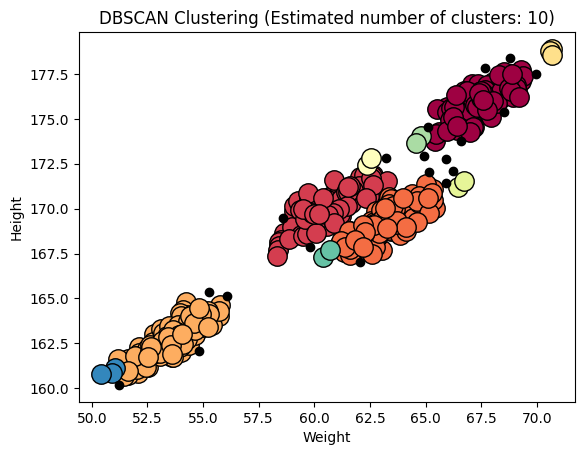

In [8]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # here i plot black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # here i plot core samples
    xy = df_selected[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14
    )


    xy = df_selected[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6
    )
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title(f'DBSCAN Clustering (Estimated number of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)})')
plt.show()